## PS1

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

## 1. Bias-variance Decomposition
### （a）plot of 5 curves 

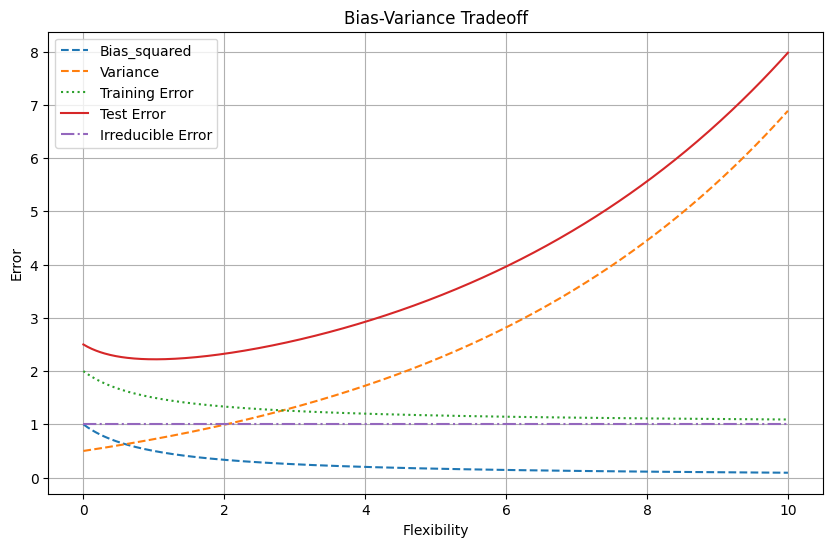

In [45]:
# sketch
flexibility = np.linspace(0, 10, 500)
bias_squared = 1 / (1 + flexibility) 
variance = np.exp(flexibility / 5) - 0.5  
irreducible_error = np.ones_like(flexibility) * 1  # set irreducible error to 1

## calculate the training error and test error
training_error = bias_squared + irreducible_error  
test_error = bias_squared + variance + irreducible_error 

# plot
plt.figure(figsize=(10, 6))
plt.plot(flexibility, bias_squared, label="Bias_squared", linestyle="--")
plt.plot(flexibility, variance, label="Variance", linestyle="--")
plt.plot(flexibility, training_error, label="Training Error", linestyle=":")
plt.plot(flexibility, test_error, label="Test Error", linestyle="-")
plt.plot(flexibility, irreducible_error, label="Irreducible Error", linestyle="-.")

# add annotation
plt.title("Bias-Variance Tradeoff")
plt.xlabel("Flexibility")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

### (b)   
As model flexibility increases,   
(1) $Bias^2$ decreases because the model can better capture the true patterns in the data；  
(2) $Variance$ increases since a more flexible model becomes overly sensitive to the training data, including noise;   
(3) $Irreducible\ Error$ remains constant as it represents randomness in the data that no model can eliminate, so it  would not change with flexibility;  
(4) $Training\ Error$ consistently decreases because a flexible model fits the training data better;  
(5) $Test\ Error$ is composed by $Bias^2$, $Variance$ and $Irreducible\ Error$, which initially decreases as the model improves but later rises due to overfitting, forming a U-shape. 

## 2. Model Choice
#### Advantages and Disadvantages
Flexible methods can result in low training error by fitting complex relationships in the data. However, they have higher variance and risk overfitting, making them less generalizable. They also tend to be harder to interpret. In contrast, less flexible methods often have higher bias, as they fail to capture complex relationships, but they have lower variance, are computationally simpler, and are easier to interpret.
#### Model Choice 
Flexible models are preferred when the relationship between predictors and the response is highly non-linear, and prediction accuracy is the main goal. Less flexible methods are more suitable when the relationship is simple, the data is noisy or limited, or when interpretability is essential.


## 3. Boston housing data
### （a）load the dataset

In [46]:
boston_df = pd.read_csv("./data/Boston.csv")
display(boston_df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### (b) explore rows and columns

In [47]:
print(boston_df.shape)

(506, 14)


There are 506 rows and 14 columns.  
The meaning of each column is below (referred to *Boston data_description.txt*):  

- `CRIM`: The per capita crime rate in each town, showing how frequently crimes occur relative to the population size.  
- `ZN`: The percentage of land zoned for residential lots larger than 25,000 square feet.  
- `INDUS`: The proportion of land in a town used for non-retail business purposes.  
- `CHAS`: A binary indicator for whether a town borders the Charles River (1 = yes, 0 = no).  
- `NOX`: The average concentration of nitric oxides in the air, measured in parts per 10 million.  
- `RM`: The average number of rooms per home in the town, which often correlates with housing size and affluence.  
- `AGE`: The proportion of owner-occupied units built prior to 1940.  
- `DIS`: The weighted distances to five Boston employment centres, reflecting accessibility to jobs.  
- `RAD`: An index of accessibility to radial highways.  
- `TAX`: The property-tax rate per \$10,000.  
- `PTRATIO`: The ratio of students to teachers in the town.  
- `B`: A transformation of the proportion of Black residents in the town. B = 1000(Bk - 0.63)^2, where Bk is the proportion of Black people by town.  
- `LSTAT`: The percentage of lower status of the population.  
- `MDEV`: Median value of owner-occupied homes in $1000's. 

### (c) scatterplots and findings

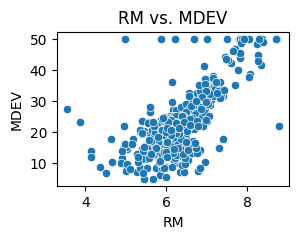

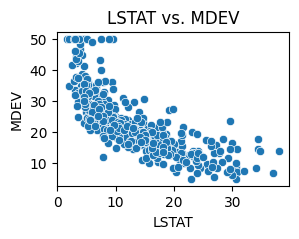

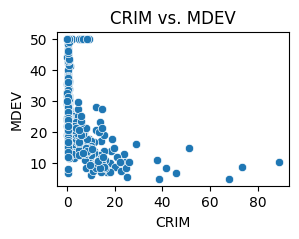

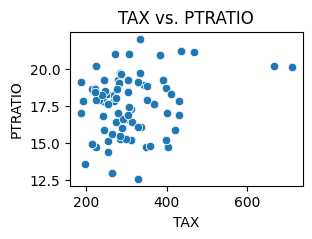

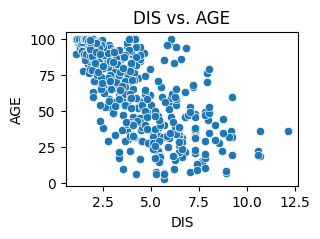

In [48]:
# plot all the pairwise scatterplots
# sns.pairplot(boston_df)
# plt.show()

# keep 5 of the most valuable pairs
selected_vars = [          #valuable pairs
    ('RM', 'MDEV'),     
    ('LSTAT', 'MDEV'), 
    ('CRIM', 'MDEV'),  
    ('TAX', 'PTRATIO'), 
    ('DIS', 'AGE')     
]

# loop through the selected pairs
for x_var, y_var in selected_vars:  
    plt.figure(figsize=(3, 2))  
    sns.scatterplot(x=boston_df[x_var], y=boston_df[y_var])  
    plt.title(f'{x_var} vs. {y_var}')  
    plt.xlabel(x_var)  
    plt.ylabel(y_var)  
    plt.show()

The scatterplot between `RM` and `MDEV` shows a positive linear relationship. Houses with more rooms generally have higher median values. This suggests that room count is an important determinant of home prices.  

The plot of `LSTAT` versus `MDEV` has a strong negative relationship. Areas with higher proportions of lower-status populations tend to have lower home values, reflecting socioeconomic disparities.  

For `CRIM` and `MDEV`, there is a weak negative relationship, with higher crime rates generally associated with lower home values, though other factors may also play a role.  

For `TAX` and `PTRATIO`, the realationship is not very strong. This is also informative, since it suggests that regional tax policies and school resources may not be directly linked. 

For `DIS` and `AGE`, the older homes are typically located farther from employment centers, likely due to the suburbanization of older housing developments as cities expanded.

### (d) 
Reviewing the scatterplots in (c) and focusing on the relationship between the above predictors and `CRIM`, there are 4 predictors that were displayed in (c) has relatively strong relationships with `CRIM`: `RM`, `MDEV`, `DIS`, `LSTAT`.

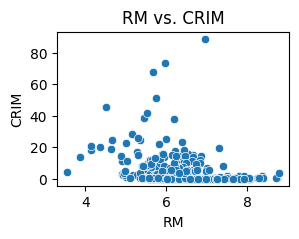

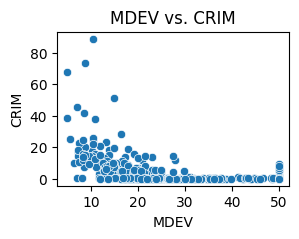

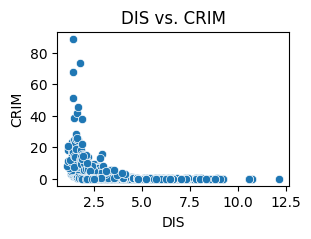

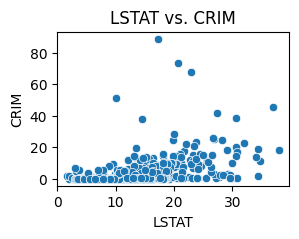

In [49]:
# scatterplot of selected pairs
selected_vars = [          
    ('RM', 'CRIM'),     
    ('MDEV', 'CRIM'), 
    ('DIS', 'CRIM'),  
    ('LSTAT', 'CRIM') 
]

# loop through the selected pairs
for x_var, y_var in selected_vars:  
    plt.figure(figsize=(3, 2))  
    sns.scatterplot(x=boston_df[x_var], y=boston_df[y_var]) 
    plt.title(f'{x_var} vs. {y_var}')  
    plt.xlabel(x_var) 
    plt.ylabel(y_var)  
    plt.show()

`CRIM` is positively associated with `LSTAT`. Areas with higher percentages of lower-status populations tend to have higher crime rates. Bad economic status is an important factor in crime.

`CRIM` is negatively associated with `RM`, as areas with more rooms per home generally experience lower crime rates. Similarly, `CRIM` is negatively associated with `MDEV`, as areas with higher median home values tend to have lower crime rates. Also, `CRIM` is negatively related to `DIS`, with greater distances from employment centers associated with lower crime rates. The reason might be that places with lower population density have lower crime rates.

### (e) particular high value in Boston

In [50]:
# Calculate the range for CRIM, TAX, and PTRATIO
predictors = ['CRIM', 'TAX', 'PTRATIO']

for predictor in predictors:
    minimum = boston_df[predictor].min()
    maximum = boston_df[predictor].max()
    ranges = maximum - minimum
    print(f'{predictor}: Min = {minimum}, Max = {maximum}, Range = {ranges}')


CRIM: Min = 0.00632, Max = 88.9762, Range = 88.96988
TAX: Min = 187.0, Max = 711.0, Range = 524.0
PTRATIO: Min = 12.6, Max = 22.0, Range = 9.4


In [51]:
# Find top 1% for each predictor
for predictor in predictors:
    top = boston_df[predictor].quantile(0.99)
    high_values = boston_df[boston_df[predictor] > top][predictor]
    print(f'Top 1% value of {predictor}:\n{high_values}')


Top 1% value of CRIM:
380    88.9762
404    41.5292
405    67.9208
410    51.1358
414    45.7461
418    73.5341
Name: CRIM, dtype: float64
Top 1% value of TAX:
488    711.0
489    711.0
490    711.0
491    711.0
492    711.0
Name: TAX, dtype: float64
Top 1% value of PTRATIO:
354    22.0
355    22.0
Name: PTRATIO, dtype: float64


#### Comments on the Predictors

The wide range of crime rates (0 to over 80) indicates significant disparities in safety across census tracts. 

The large variation in tax rates (187 to 711) reflects differences in local government funding or property values. High tax rates may indicate affluent areas but could also make housing less affordable, contributing to socioeconomic stratification.

While the variation in pupil-teacher ratios is smaller, higher ratios (above 20) may reflect underfunded schools, potentially suggesting educational inequality.

### (f) Bound Charles River

In [52]:
# Count tracts that bound the Charles River
charles_bound = boston_df[boston_df['CHAS'] == 1].shape[0]
print(f"There are {charles_bound} bound the Charles River.")

There are 35 bound the Charles River.


### (g) median pupil-teacher ratio

In [53]:
# Calculate the median of PTRATIO
median_ptratio = boston_df['PTRATIO'].median()
print(f'The median pupil-teacher ratio is {median_ptratio}.')

The median pupil-teacher ratio is 19.05.


### (h) lowest MDEV and comparison with overall range

In [54]:
# Find the lowest MDEV
lowest_mdev = boston_df[boston_df['MDEV'] == boston_df['MDEV'].min()]

# Display other predictors in that tract
print("Census tract with lowest MDEV are below:")
display(lowest_mdev)

Census tract with lowest MDEV are below:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


Both 398 and 405 have the lowest MDEV in the dataset (MDEV = 5.0).

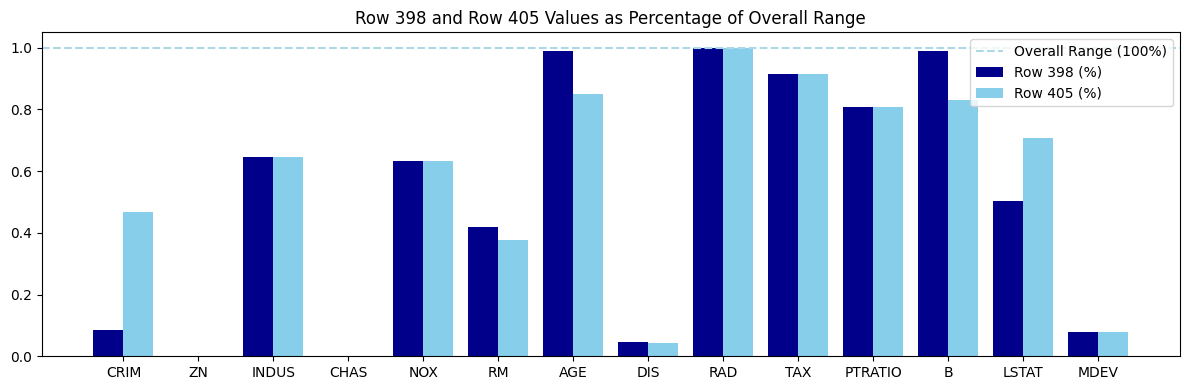

In [55]:
# Caculate the overall range
overall_min = boston_df.min()
overall_max = boston_df.max()
overall_range = overall_max - overall_min

# Compare the 398 and 405 data to overall range
row_398 = (boston_df.iloc[397] - overall_min) / overall_range
row_405 = (boston_df.iloc[404] - overall_min) / overall_range

# draw a bar plot
variables = boston_df.columns
x = np.arange(len(variables))
plt.figure(figsize=(12, 4))
plt.bar(x - 0.2, row_398, 0.4, label="Row 398 (%)", color='darkblue')
plt.bar(x + 0.2, row_405, 0.4, label="Row 405 (%)", color='skyblue')

# baseline for overall range
plt.axhline(y=1, color='lightblue', linestyle='--', label="Overall Range (100%)")

# add annotation
plt.xticks(x, variables)
plt.title("Row 398 and Row 405 Values as Percentage of Overall Range")
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

Both tracts have relatively high values for industrial land use (`INDUS`), air pollution (`NOX`), the proportion of older housing (`AGE`), highway accessibility (`RAD`), property tax rate (`TAX`), student-to-teacher ratio (`PTRATIO`), low racial diversity (`B`), and the percentage of lower-status residents (`LSTAT`). Among these, the proportion of older housing (`AGE`) and highway accessibility (`RAD`) are near the maximum of the overall range, and the racial diversity measure (`B`) for Row 398 is also very close to the maximum. These findings suggest that these areas are heavily urbanized, potentially contributing to poorer living conditions.

Meanwhile, both tracts have very low values for the distance to employment centers (`DIS`) and the average number of rooms per dwelling (`RM`). These findings indicate that these tracts are well-connected urban areas, likely in proximity to city centers. 

However, Row 398 has a relatively low crime rate(`CRIM`), while Row 405 has a much higher crime rate. Despite many similar socioeconomic features, there should be other factors that influence crime rates in these areas. This needs further research.


### (i) rooms per dwelling

In [56]:
# Count census tracts with more than 7 rooms per dwelling
m7 = boston_df[boston_df['RM'] > 7].shape[0]

# Count and display census tracts with more than 8 rooms per dwelling
m8 = boston_df[boston_df['RM'] > 8].shape[0]
tracts_m8 = boston_df[boston_df['RM'] > 8]

print(f'{m7} tracts has averagely more than 7 rooms per dwelling.')
print(f'{m8} tracts has averagely more than 8 rooms per dwelling.')
display(tracts_m8.describe().transpose())


64 tracts has averagely more than 7 rooms per dwelling.
13 tracts has averagely more than 8 rooms per dwelling.


,count,mean,std,min,25%,50%,75%,max
CRIM,13.0,0.718795,0.901640,0.02009,0.33147,0.52014,0.57834,3.47428
ZN,13.0,13.615385,26.298094,0.00000,0.00000,0.00000,20.00000,95.00000
INDUS,13.0,7.078462,5.392767,2.68000,3.97000,6.20000,6.20000,19.58000
CHAS,13.0,0.153846,0.375534,0.00000,0.00000,0.00000,0.00000,1.00000
NOX,13.0,0.539238,0.092352,0.41610,0.50400,0.50700,0.60500,0.71800
RM,13.0,8.348538,0.251261,8.03400,8.24700,8.29700,8.39800,8.78000
AGE,13.0,71.538462,24.608723,8.40000,70.40000,78.30000,86.50000,93.90000
DIS,13.0,3.430192,1.883955,1.80100,2.28850,2.89440,3.65190,8.90670
RAD,13.0,7.461538,5.332532,2.00000,5.00000,7.00000,8.00000,24.00000
TAX,13.0,325.076923,110.971063,224.00000,264.00000,307.00000,307.00000,666.00000


#### Features of Census Tracts with More Than 8 Rooms

Census tracts with an average of more than 8 rooms per dwelling show consistent characteristics in several features. These areas have low percentages of lower-status residents (`LSTAT`), lower tax rates (`TAX`) and low crime rates (`CRIM`), indicating a good socioeconomic status. The houses (`AGE`) are relatively old, and the student-to-teacher ratio (`PTRATIO`) is low, suggesting well-resourced schools. Additionally, these areas have similar levels of air pollution (`NOX`), reflecting a clean environment.

Some other features, such as distance to employment centers (`DIS`) and highway accessibility (`RAD`), show some variability. These tracts may include both suburban areas and urban neighborhoods.

## 4. Income and Regression
### (a)
(iii) is correct.  

For a fixed GPA and IQ, the effect of Level on $\hat{y}$ is given by $\beta_3 + \beta_5 \cdot \text{GPA}$, which equals $35 - 10 \cdot \text{GPA}$. 

If GPA exceeds 3.5, then $35 - 10 \cdot \text{GPA} < 0$, meaning $\hat{y}$ decreases as Level increases. This explains why high school graduates earn more, on average, than college graduates when GPA is sufficiently high.

### (b)

In [57]:
# Coefficients
beta_0 = 50
beta_1 = 20
beta_2 = 0.07
beta_3 = 35
beta_4 = 0.01
beta_5 = -10

# Values
GPA = 4.0
IQ = 110
Level = 1  # College graduate

# Formula
y_hat = (beta_0 + beta_1 * GPA + beta_2 * IQ + beta_3 + beta_4 * GPA * IQ + beta_5 * GPA * Level)
print(f'The predicted salary is ${y_hat * 1000}')


The predicted salary is $137100.0


### (c)
The statement is false.  

Although the coefficient for the GPA/IQ interaction term $\beta_4 = 0.01$ is small, the coefficient alone does not determine the size of the interaction effect. The actual contribution of the interaction term depends on both the coefficient and the magnitude of the interaction variable $\text{GPA} \times \text{IQ}$. 

In this case, GPA and IQ are likely to take relatively large values (e.g., GPA between 3.0 - 4.0, IQ between 80 - 200), making their product significant. 



## 5. Boston data and Regression
### (a) separate regression

In [58]:
# Lookup the missing values
# print(boston_df.isna().sum())-- no missing values

In [59]:
# prepare predictors
predictors = boston_df.drop('CRIM', axis=1).columns

#  create a dictionary to store the coefficients
univariate_coeffs = []

# run regression through a loop
for predictor in predictors:
    formula = f'CRIM ~ {predictor}'  
    model = smf.ols(formula, boston_df).fit()
    univariate_coeffs.append({
        'predictor': predictor,
        'coefficient': model.params[predictor],
        'p-value': model.pvalues[predictor]
    })
# convert to DataFrame
univariate_coeffs_df = pd.DataFrame(univariate_coeffs)
display(univariate_coeffs_df)

,predictor,coefficient,p-value
0,ZN,-0.073521,6.151722e-06
1,INDUS,0.506847,2.444137e-21
2,CHAS,-1.871545,2.143436e-01
3,NOX,30.975259,9.159490e-23
4,RM,-2.691045,5.838094e-07
5,AGE,0.107131,4.259064e-16
6,DIS,-1.542831,1.268832e-18
7,RAD,0.614137,1.620605e-55
8,TAX,0.029563,9.759521e-47
9,PTRATIO,1.144613,3.875122e-11


#### Relationships Between Variables and `CRIM`

All models show statistically significant  associations except `CHAS`.

Positive Relationships:   
Several variables are positively associated with `CRIM`. These include `INDUS`, `NOX`, `AGE`, `RAD`, `TAX`, `PTRATIO`, and `LSTAT`. Areas with higher values in these variables tend to experience higher crime rates. Among these, `NOX` and `INDUS` have relatively large coefficients, indicating that changes in these variables have a more pronounced impact on `CRIM`.

Negative Relationships:   
On the other hand, variables such as `ZN`, `RM`, `DIS`, `B`, and `MDEV` are negatively associated with `CRIM`. This suggests that areas with higher values in these variables generally have lower crime rates. Among these, `DIS` and `MDEV` have relatively large negative coefficients, indicating stronger effects in reducing `CRIM` as these variables increase.


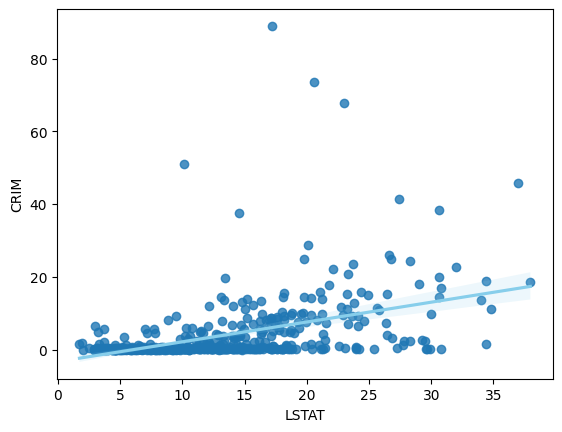

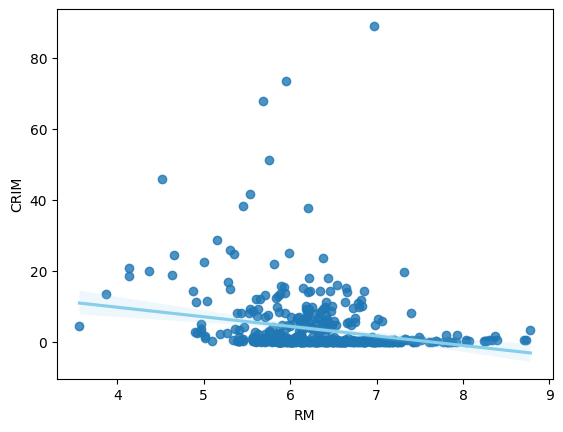

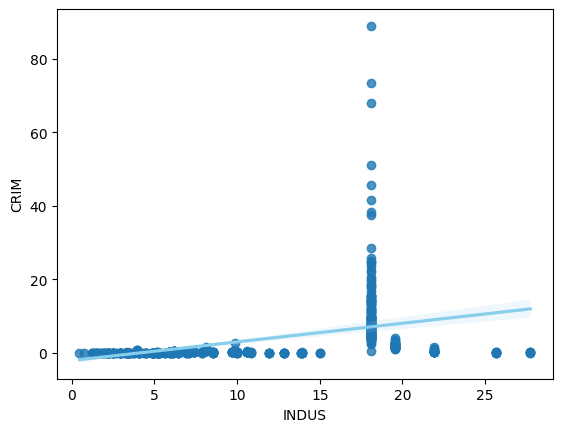

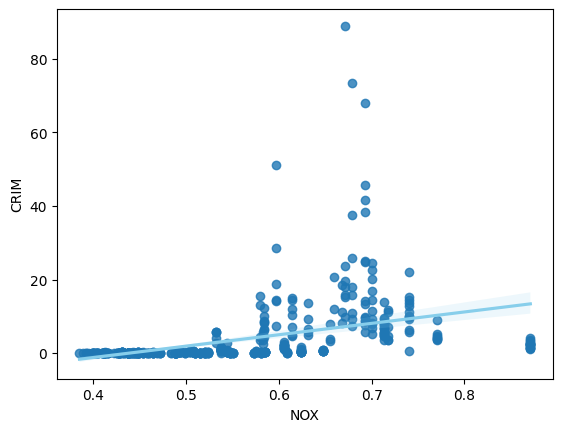

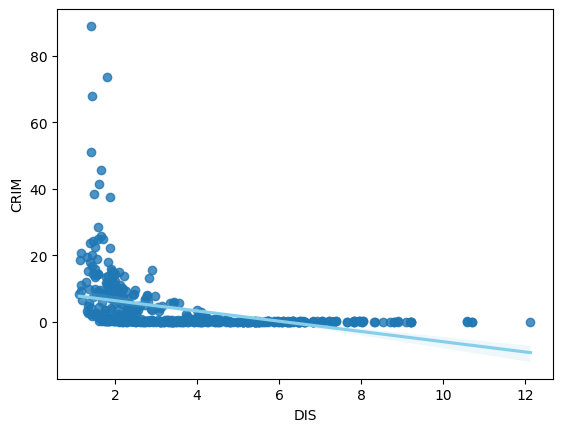

In [60]:
# plot
selected_predictors = ['LSTAT', 'RM', 'INDUS', 'NOX', 'DIS']

for predictor in selected_predictors:
    sns.regplot(x=boston_df[predictor], y=boston_df['CRIM'], line_kws={"color": "skyblue"})
    plt.xlabel(predictor)
    plt.ylabel("CRIM")
    plt.show()

### (b) Multiple Regression

In [61]:
# define the regression formula
formula = 'CRIM ~ ' + ' + '.join(predictors)
model = smf.ols(formula, boston_df).fit()

# create a dictionary to store the coefficients
multiple_coeffs = model.params.drop('Intercept')

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     30.73
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           2.04e-55
Time:                        12:27:11   Log-Likelihood:                -1655.7
No. Observations:                 506   AIC:                             3339.
Df Residuals:                     492   BIC:                             3399.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.4184      7.270      2.396      0.0

The multiple regression model shows that the predictors `ZN`, `NOX`, `DIS`, and `RAD` are significant with p-values < 0.05, meaning we can reject the null hypothesis for these variables. 

### (c) Compare 5(a) and 5(b)

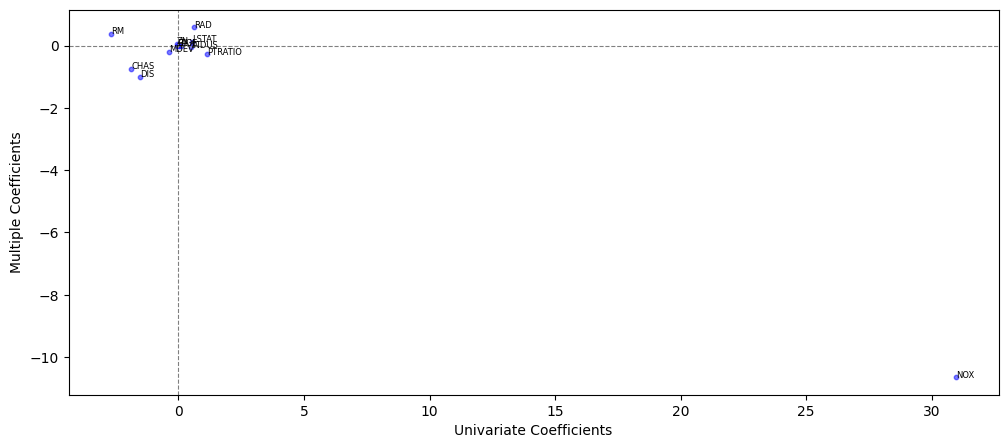

In [62]:
# Convert univariate_coeffs to DataFrame
univariate_coeffs_df = pd.DataFrame(univariate_coeffs)

# put the coefficients into a DataFrame
coeffs_df = pd.DataFrame({
    'Predictor': predictors,
    'Univariate': univariate_coeffs_df.set_index('predictor').loc[predictors, 'coefficient'].values,
    'Multiple': multiple_coeffs[predictors].values
})

# plot
plt.figure(figsize=(12, 5))
plt.scatter(coeffs_df['Univariate'], coeffs_df['Multiple'], color='blue', alpha=0.5, s=10)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
for i, row in coeffs_df.iterrows(): # add names to the points
    plt.text(row['Univariate'], row['Multiple'], row['Predictor'], fontsize=6)
plt.xlabel('Univariate Coefficients')
plt.ylabel('Multiple Coefficients')
plt.show()

The univariate regression (results from 5(a)) coefficients often overestimate the relationship between individual predictors and `CRIM` because they do not account for confounding effects from other variables. For example, the coefficient for `NOX` in the univariate regression is strongly positive, but in the multiple regression (results from 5(b)), it becomes negative, indicating that its effect on `CRIM` is affected by other factors. On the other hand, some predictors, like `DIS` and `RAD`, show consistent relationships in both models. When other variables are present, multiregression is important for us to understand the true predictor effect.

### (d) Non-linear relationship

In [63]:
# prepare the predictors
predictors = boston_df.drop(columns=['CHAS', 'CRIM']).columns

#  prepare a data frame to store the results
results = []

# Loop through predictors
for predictor in predictors:
    # Fit the regression model
    formula = f'CRIM ~ {predictor} + I({predictor}**2) + I({predictor}**3)'
    model = smf.ols(formula, boston_df).fit()
    # Store the results
    results.append({
        'Predictor': predictor,
        'P_Value_2': model.pvalues[f'I({predictor} ** 2)'],
        'P_Value_3': model.pvalues[f'I({predictor} ** 3)']
    })
# Convert the results to a DataFrame
results_df = pd.DataFrame(results)
display(results_df)

,Predictor,P_Value_2,P_Value_3
0,ZN,9.562861e-02,2.322242e-01
1,INDUS,4.530067e-10,1.704441e-12
2,NOX,1.522887e-14,1.587778e-15
3,RM,3.727455e-01,5.206759e-01
4,AGE,4.742487e-02,6.784650e-03
5,DIS,5.552306e-12,1.161292e-08
6,RAD,6.147821e-01,4.851059e-01
7,TAX,1.406673e-01,2.474762e-01
8,PTRATIO,4.384601e-03,6.674970e-03
9,B,4.474840e-01,5.086733e-01


The predictors `INDUS`, `NOX`, `AGE`, `DIS`, `PTRATIO`, and `MDEV` exhibit statistically significant nonlinear relationships with `CRIM`, based on the p-values of their quadratic or cubic terms.